In [165]:
import numpy as np
import pandas as pd

In [166]:
df = pd.DataFrame(pd.read_csv('../data/before_scaling.csv'))
df.columns

Index(['school_GP', 'school_MS', 'fromCity', 'sex', 'age', 'famMore3',
       'liveTogether', 'Medu', 'Fedu', 'noParent', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

(<Axes: >, <Axes: >)

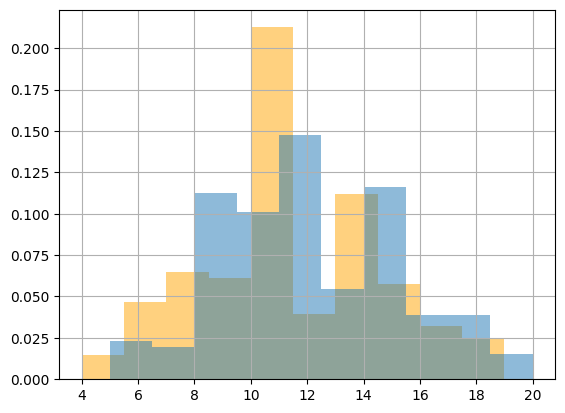

In [167]:
df[df['sex'] == 0]['G3'].hist(color='orange', density=True, alpha=0.5, label='sex0'), df[df['sex'] == 1]['G3'].hist(alpha=0.5, density=True, label='sex1')

(<Axes: >, <Axes: >)

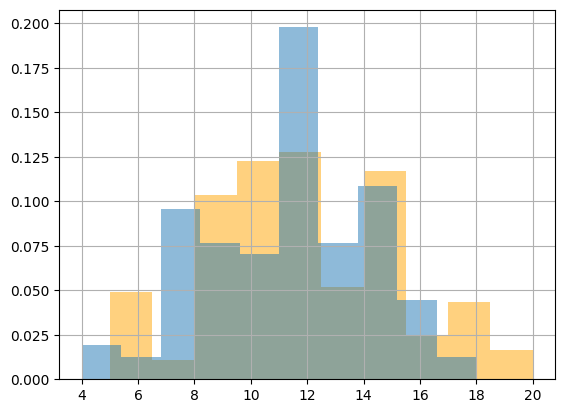

In [168]:
df[df['romantic'] == 0]['G3'].hist(color='orange', density=True, alpha=0.5, label='sex0'), df[df['romantic'] == 1]['G3'].hist(alpha=0.5, density=True, label='sex1')

(<Axes: >, <Axes: >)

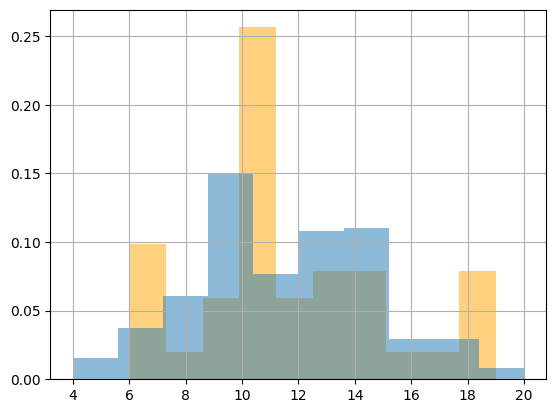

In [169]:
df[df['liveTogether'] == 0]['G3'].hist(color='orange', density=True, alpha=0.5, label='sex0'), df[df['liveTogether'] == 1]['G3'].hist(alpha=0.5, density=True, label='sex1')

(<Axes: >, <Axes: >)

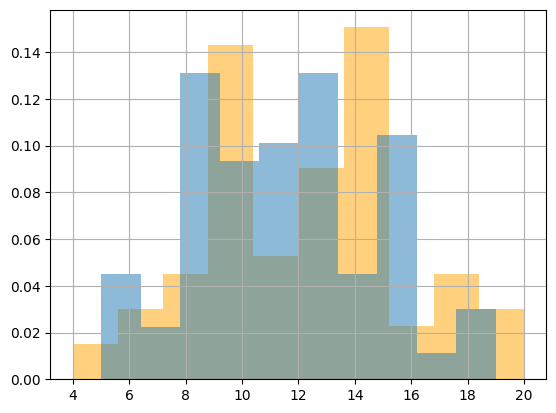

In [170]:
df[df['health'] < 3]['G3'].hist(color='orange', density=True, alpha=0.5, label='sex0'), df[df['health'] > 3]['G3'].hist(alpha=0.5, density=True, label='sex1')

(<Axes: >, <Axes: >)

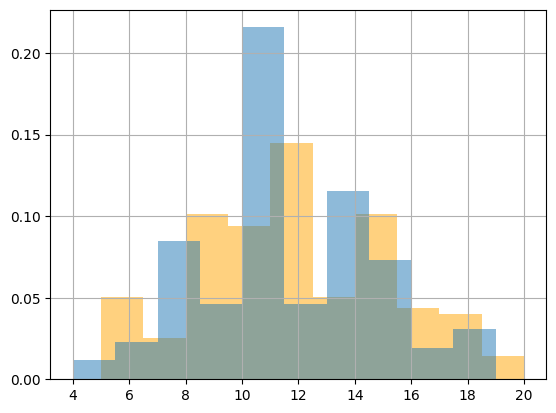

In [171]:
df[df['paid'] == 0]['G3'].hist(color='orange', density=True, alpha=0.5, label='sex0'), df[df['paid'] == 1]['G3'].hist(alpha=0.5, density=True, label='sex1')

In [172]:


c1 = df[df['paid'] == 1].mean(numeric_only=True)
c0 = df[df['paid'] == 0].mean(numeric_only=True)

# 차이 계산 (상위 - 하위)
diff = c1 - c0

print(diff.sort_values(ascending=False))  # 차이 큰 순서대로 보기

paid            1.000000
Medu            0.340663
famsup          0.290180
studytime       0.266147
Fedu            0.218742
Walc            0.143755
Dalc            0.114696
internet        0.102130
nursery         0.083061
goout           0.067731
higher          0.064872
liveTogether    0.032514
fromCity        0.031384
famMore3        0.020765
romantic        0.019352
school_GP       0.015173
noParent       -0.012158
activities     -0.013760
school_MS      -0.015173
schoolsup      -0.025006
famrel         -0.025195
G2             -0.056390
traveltime     -0.085543
age            -0.094151
health         -0.111931
sex            -0.116078
freetime       -0.130592
G1             -0.151640
failures       -0.168290
G3             -0.186385
absences       -0.535625
dtype: float64


### 마지막 전처리

In [173]:
# 시골학교 빼기
df = df[df['school_GP'] == 1]

# 부모교육 하나로 합침
df.insert(df.columns.get_loc('Medu'), 'Pedu', (df['Medu'] + df['Fedu']) / 2)

# 술 하나로 합침
df.insert(df.columns.get_loc('Dalc'), 'alc', (df['Dalc'] + df['Walc']) / 2)

df.insert(df.columns.get_loc('G3'), 'grade', (df['G1'] + df['G2'] + df['G3']) / 3)



# 하나로 합쳐진 컬럼 제거
df.drop(columns=['school_GP', 'school_MS', 'Medu', 'Fedu', 'Dalc', 'Walc', 'G1', 'G2', 'G3'], inplace=True)

# 예측이 유의미하지 않는 컬럼 제거
df.drop(columns=['noParent', 'nursery', 'nursery', 'liveTogether', 'romantic', 'health', 'higher', 'schoolsup', 'famsup', 'famrel', 'failures', 'famMore3', 'paid'], inplace=True)

In [174]:
df.columns

Index(['fromCity', 'sex', 'age', 'Pedu', 'traveltime', 'studytime',
       'activities', 'internet', 'freetime', 'goout', 'alc', 'absences',
       'grade'],
      dtype='object')

In [175]:
print((df[df['Pedu'] > 2].mean() - df[df['Pedu'] < 3].mean()).sort_values(ascending=False))


Pedu          1.499204
grade         0.875920
absences      0.560697
activities    0.115522
goout         0.102786
internet      0.085572
fromCity      0.070746
sex           0.042488
freetime      0.017114
studytime    -0.011940
alc          -0.035025
age          -0.183781
traveltime   -0.226368
dtype: float64


In [176]:
above_q3 = df[df['grade'] >= df['grade'].quantile(0.75)]
low_q1 = df[df['grade'] <= df['grade'].quantile(0.25)]

print('성적 상위 25% 학생들 특성')
for v, c in above_q3['Pedu'].value_counts().items():
    print(v, c)
print('\n성적 하위 25% 학생들 특성')
for v, c in low_q1['Pedu'].value_counts().items():
    print(v, c)

성적 상위 25% 학생들 특성
3.5 20
4.0 20
3.0 15
2.5 10
2.0 9
1.5 7
1.0 4
0.5 1

성적 하위 25% 학생들 특성
2.0 16
3.0 14
1.5 12
4.0 10
1.0 10
2.5 9
3.5 8
0.5 1


In [177]:
# 두 집단의 평균 구하기
above_q3 = df[df['grade'] >= df['grade'].quantile(0.75)]
low_q1 = df[df['grade'] <= df['grade'].quantile(0.25)]

mean_above = above_q3.mean(numeric_only=True)
mean_low = low_q1.mean(numeric_only=True)


# 차이 계산 (상위 - 하위)
diff = mean_above - mean_low

print(diff.sort_values(ascending=False))  # 차이 큰 순서대로 보기


grade         7.758236
Pedu          0.529360
studytime     0.272674
sex           0.144767
fromCity      0.110465
internet      0.094477
freetime      0.079942
activities    0.071512
traveltime   -0.207558
age          -0.275291
alc          -0.436919
goout        -0.515407
absences     -4.323837
dtype: float64


In [178]:
df.to_csv('../data/fkillerML_data.csv', index=False)